In [81]:
import pandas as pd
import re
import numpy as np

# Load the data
customer_categories_df = pd.read_excel('Data/Customer Categories.xlsx')

In [82]:
import os

csv_folder = os.path.join(os.getcwd(), "csv_outputs")
json_folder = os.path.join(os.getcwd(), "json_outputs")

In [83]:
print("Columns:", customer_categories_df.columns.tolist())

Columns: ['CCAT_CODE', 'CCAT_DESC']


In [84]:
print("Sample data:\n", customer_categories_df.head())

Sample data:
    CCAT_CODE                       CCAT_DESC
0          0                         Unknown
1          0                         Unknown
2          1                  House accounts
3         10                              No
4         11  stock movemnt shipments/backup


In [85]:
print("Null values:\n", customer_categories_df.isnull().sum())

Null values:
 CCAT_CODE    0
CCAT_DESC    0
dtype: int64


In [86]:
# Remove rows with any null values
customer_categories_df = customer_categories_df.dropna()

In [87]:
print("Data shape:", customer_categories_df.shape)

Data shape: (51, 2)


STANDARDIZATION OF THE VALUES (GROUPINGS AND RENAMINGS)

In [88]:
"""
This dictionary standardizes and clarifies ambiguous or inconsistent customer category descriptions (CCAT_DESC).
It serves three main purposes:
1. Replaces internal or operational labels (e.g., "samples", "stock movement shipments/backup") with grouped tags like "Operational Accounts"
2. Renames vague or status-based entries (e.g., "CLOSED", "bad debts") to clearer categories like "Inactive Accounts"
3. Cleans up location-based descriptions for consistency (e.g., "Johannesburg CBDI" → "Johannesburg CBD")

Note: Location-based entries are preserved as-is (with minor renaming) because geographic segmentation is already handled
separately via REGION_CODE and REGION_DESC. This avoids redundancy while maintaining semantic clarity.
"""

corrections = {
    # Operational and internal
    "stock movemnt shipments/backup": "Operations (Stock)",
    "samples": "Sample Operational Accounts",
    "House accounts": "Internal Accounts",
    "bad debts": "Inactive Accounts",
    "CLOSED": "Inactive Accounts",
    "Advertising App": "Operations (Advertising)",
    "Advertising Appro": "Operations (Advertising)",
    "Advertising Appo.": "Operations (Advertising)",
    "Consignment": "Operations (Consignment)",

    # Retail groupings
    "Departmentstore": "Retail - Department Store",
    "Speciality stores": "Retail - Specialty Stores",
    "sale goods": "Retail",

    # Botswana segmentation
    "Botswana trip excl Exports": "Botswana (Trip)",
    "Exports incl Botswana": "Botswana (Exports)",

    # Location-based cleanup
    "Johannesburg CBDl": "Johannesburg CBD",
    "Pretoria East": "Pretoria East",
    "Pretoria Central": "Pretoria Central",
    "Ermelo Pietretief": "Ermelo/Piet Retief",
    "Pietersburg / Potgietersrus": "Pietersburg/Potgietersrus",
    "Rustenburg Brits": "Rustenburg/Brits",
    "Gauteng North - Sandton": "Gauteng North - Sandton",
    "Gauteng North - Rustenburg / Izaneen": "Rustenburg/Tzaneen",
    "Potch KlerksD Kuruman": "Potchefstroom/Klerksdorp/Kuruman",
    "N- prov. Witbank Midd burg": "Witbank/Middelburg (Mpumalanga)",
    "kwz natal/DBN Deon": "KwaZulu-Natal/Durban",
    "G North-N/ Randburg/Rivonia": "Gauteng North - Randburg/Rivonia",
    "Gaut.N-EastgateNorwoodMidr": "Gauteng North - Eastgate/Norwood/Midrand",
    "W cape/CT": "Western Cape/Cape Town",
    "E Cape": "Eastern Cape",
    "Free state": "Free State",
    "Soweto Lenasia": "Soweto/Lenasia",
    "Krugersdorp Suncity": "Krugersdorp/Suncity"
}

In [89]:
customer_categories_df['CCAT_DESC'] = customer_categories_df['CCAT_DESC'].replace(corrections)

customer_categories_df

,CCAT_CODE,CCAT_DESC
0,0,Unknown
1,0,Unknown
2,1,Internal Accounts
3,10,No
4,11,Operations (Stock)
5,12,Sample Operational Accounts
6,13,Retail
7,14,Johannesburg CBD
8,15,no
9,16,Pretoria East


In [90]:
#Drop the rows with invalid or empty descriptions
invalid_ccat_desc = ["Unknown", "No", "no", "?", "", None]
customer_categories_df_clean = customer_categories_df[
    ~customer_categories_df['CCAT_DESC'].isin(invalid_ccat_desc)
]

In [91]:
print("Cleaned data shape:", customer_categories_df_clean.shape)

Cleaned data shape: (36, 2)


In [92]:
customer_categories_df_clean

,CCAT_CODE,CCAT_DESC
2,1,Internal Accounts
4,11,Operations (Stock)
5,12,Sample Operational Accounts
6,13,Retail
7,14,Johannesburg CBD
9,16,Pretoria East
11,18,Pietersburg/Potgietersrus
12,19,Nelspruit / Tzaneen
13,2,Pretoria Central
14,20,Inactive Accounts


In [93]:
# Save CSV
csv_path = os.path.join(csv_folder, "customer_categories_df_clean.csv")
customer_categories_df_clean.to_csv(csv_path, index=False)

# Save JSON
json_path = os.path.join(json_folder, "customer_categories_df_clean.json")
customer_categories_df_clean.to_json(json_path, orient="records", lines=True)

VISUALIZATIONS

<Axes: ylabel='CCAT_DESC'>

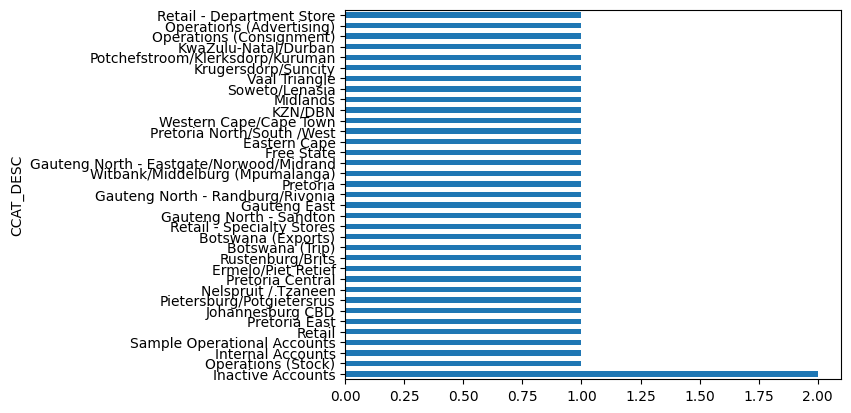

In [94]:
import matplotlib

customer_categories_df_clean['CCAT_DESC'].value_counts().plot(kind='barh')

Customer Count by Cleaned Category

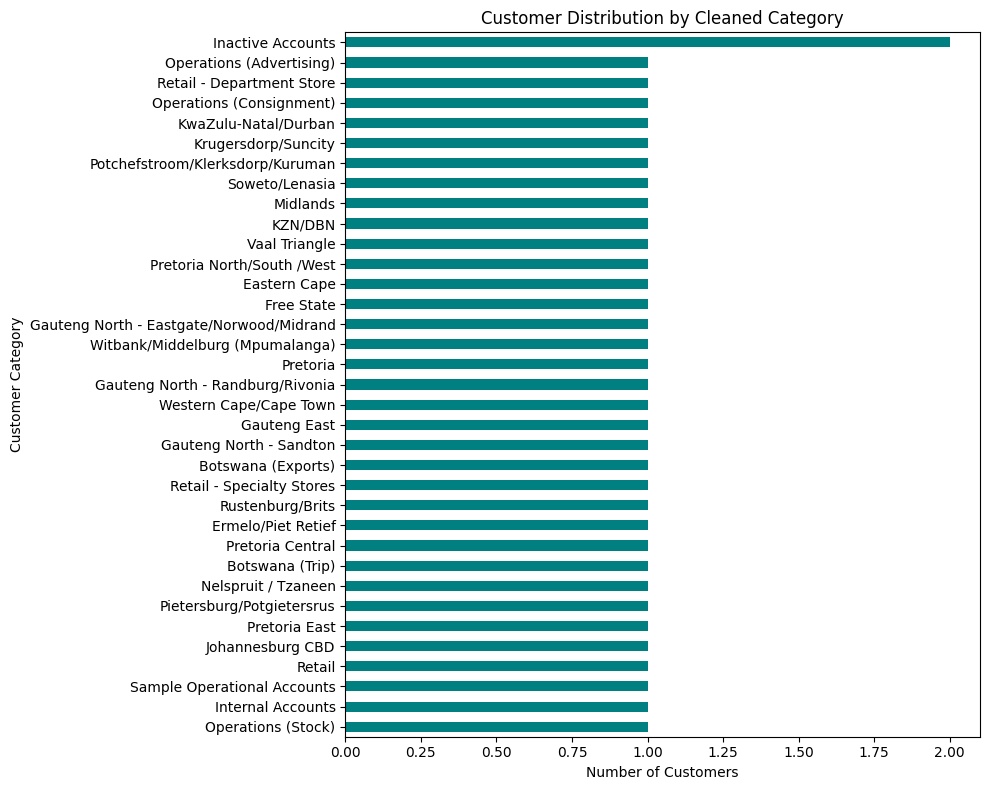

In [95]:
import matplotlib.pyplot as plt

customer_categories_df_clean['CCAT_DESC'].value_counts().sort_values().plot(
    kind='barh', figsize=(10, 8), color='teal'
)
plt.title("Customer Distribution by Cleaned Category")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Category")
plt.tight_layout()
plt.show()

#Category Distribution by Region

Top 10 Most Common CCAT_CODEs

In [96]:
code_to_desc = customer_categories_df_clean.set_index('CCAT_CODE')['CCAT_DESC'].to_dict()
top_codes = customer_categories_df_clean['CCAT_CODE'].value_counts().head(10)

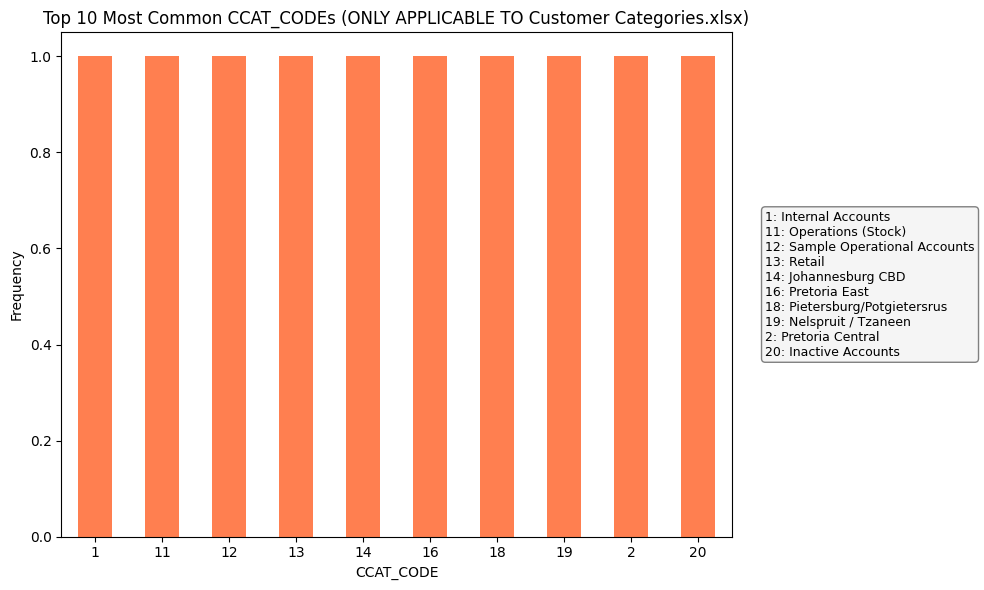

In [97]:
fig, ax = plt.subplots(figsize=(10, 6))
top_codes.plot(kind='bar', color='coral', ax=ax)

plt.title("Top 10 Most Common CCAT_CODEs (ONLY APPLICABLE TO Customer Categories.xlsx)")
plt.xlabel("CCAT_CODE")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

# Create legend text
legend_text = "\n".join([f"{code}: {code_to_desc.get(code, 'Unknown')}" for code in top_codes.index])

# Add legend box to the side
props = dict(boxstyle='round', facecolor='whitesmoke', edgecolor='gray')

# Position the legend box outside the plot area
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes,
        fontsize=9, verticalalignment='center', bbox=props)

plt.tight_layout()
plt.show()